### Import library

In [6]:
import os
import random
import re
import csv

import matplotlib.pyplot as plt

In [ ]:
def create_random_wav_txt(dir_path: str, output_file_path: str):
    """
    65個のランダムな刺激用のテキストファイルを作成する関数

    parameters
        dir_path: .wavのファイルが存在するディレクトリパス
        output_file_path: 出力テキストファイルのパス

    output
        output_file: ランダムに取得した.wavが.txtに65個記載されている
    """

    wav_files = [f for f in os.listdir(dir_path) if f.endswith('.wav')] * 5
    random_samples = random.sample(wav_files, len(wav_files))

    with open(output_file_path, 'w') as f:
        for file in random_samples:
            f.write(file + '\n')

    print(f'ランダムに選択された.wavファイルが {len(wav_files)} 個、{output_file_path} に保存されました。')

def count_vowel(result_txt_path: str):
    """
    母音ごとに出現回数をカウントする

    parameters
        result_txt_path: 刺激での入力母音が格納されたテキストファイルパス
    """

    aiueo = {"a": 0, "i": 0, "u": 0, "e": 0, "o": 0}
    with open(result_txt_path, "r") as file:
        lines = file.readlines()

    for line in lines:
        aiueo[line.strip().lower()]+=1

    print(aiueo)

def create_csv_result(
        random_stims_txt_path: str, 
        result_txt_path: str,
        output_csv_path: str) -> tuple[list[int], list[int], list[str]]:
    """
    f1, f2, vowelをまとめたcsvの作成

    parameters:
        random_stims_txt_path: 65個の刺激が格納されたファイルパス
        result_txt_path: 母音の入力結果が格納されたファイルパス
        output_csv_path: 出力するcsvのパス

    return
        f1_list: 65個のf1が格納されたリスト
        f2_list: 65個のf2が格納されたリスト
        vowel_list: 65個の入力したvowelが格納されたリスト

    """
    with open(random_stims_txt_path, "r") as stims, open(result_txt_path, "r") as result:
        stims_lines = stims.readlines()
        vowels_lines = result.readlines()
        extracted_numbers = []

        for stim, vowel in zip(stims_lines, vowels_lines):
            numbers = re.findall(r'f1_(\d+).*f2_(\d+)', stim, re.IGNORECASE)
            if numbers:
                extracted_numbers.append([numbers[0][0], numbers[0][1], vowel.strip()])

        with open(output_csv_path, mode='w', newline='') as output_file:
            writer = csv.writer(output_file)
            writer.writerow(["F1", "F2", "vowel"])
            writer.writerows(extracted_numbers)

        print(f"csv: {output_csv_path}が出力されました。")

    f1_list = [int(x[0]) for x in extracted_numbers]
    f2_list = [int(x[1]) for x in extracted_numbers]
    vowel_list = [x[2] for x in extracted_numbers]

    return f1_list, f2_list, vowel_list

def plot_results(f1_list: list[int], f2_list: list[int], vowel_list: list[str]):

    """
    結果を散布図でプロット
    parameters

    """

    vowel_colors = {"a": "red", "e": "blue", "i": "green", "o": "red", "u": "blue"}
    plt.figure(figsize=(16, 12))

    for f1, f2, vowel in zip(f1_list, f2_list, vowel_list):
        color = vowel_colors.get(vowel, "gray")
        plt.scatter(f1, f2, color=color, label=vowel if vowel not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.3)

    plt.title("plot category recognization")
    plt.xlabel("F1")
    plt.ylabel("F2")
    plt.xlim(min(f1_list)-100, max(f1_list)+100)
    plt.ylim(min(f2_list)-100, max(f2_list)+100)

    plt.legend(title="Vowel", loc="best")

    plt.show()

## aeのとき

### 65個のランダム刺激の作成

In [13]:
random.seed(777)

dir_path_ae = "wave_dir_ae"
output_txt_file_path_ae = "wave_ae_stimlist.txt"
create_random_wav_txt(dir_path_ae, output_txt_file_path_ae)

ランダムに選択された.wavファイルが 65 個、wave_ae_stimlist.txt に保存されました。


### 結果の出力と可視化

{'a': 28, 'i': 0, 'u': 0, 'e': 37, 'o': 0}
csv: result_ae.csvが出力されました。


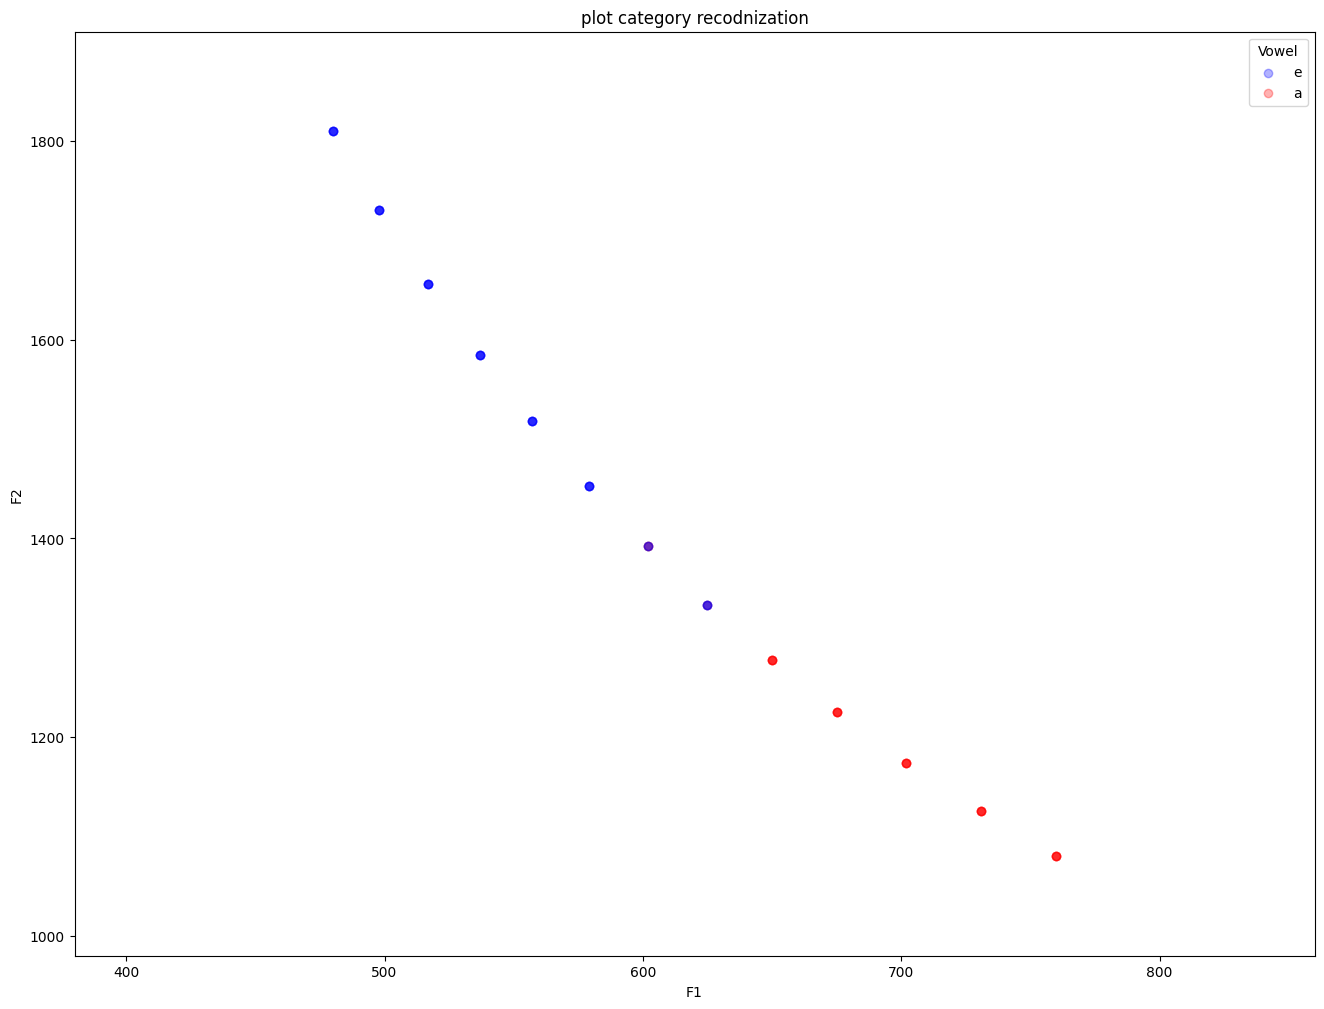

In [26]:
result_txt_path_ae ="result_ae.txt"
output_csv_path_ae = "result_ae.csv"
count_vowel(result_txt_path_ae)
f1_list_ae, f2_list_ae, vowel_list_ae=create_csv_result(output_txt_file_path_ae, result_txt_path_ae, output_csv_path_ae)
plot_results(f1_list_ae, f2_list_ae, vowel_list_ae)

## uoのとき

F1
315, 325, 336, 346, 357, 369, 381, 393, 406, 419, 432, 446, 460

F2 
1100, 1077, 1054, 1031, 1009, 988, 967, 946, 926, 907, 887, 868, 850

### 65個のランダム刺激の作成

In [15]:
random.seed(777)

dir_path_uo = "wave_dir_uo"
output_txt_file_path_uo = "wave_uo_stimlist.txt"
create_random_wav_txt(dir_path_uo, output_txt_file_path_uo)

ランダムに選択された.wavファイルが 65 個、wave_uo_stimlist.txt に保存されました。


### 結果の出力と可視化

{'a': 0, 'i': 0, 'u': 34, 'e': 0, 'o': 31}
csv: result_uo.csvが出力されました。


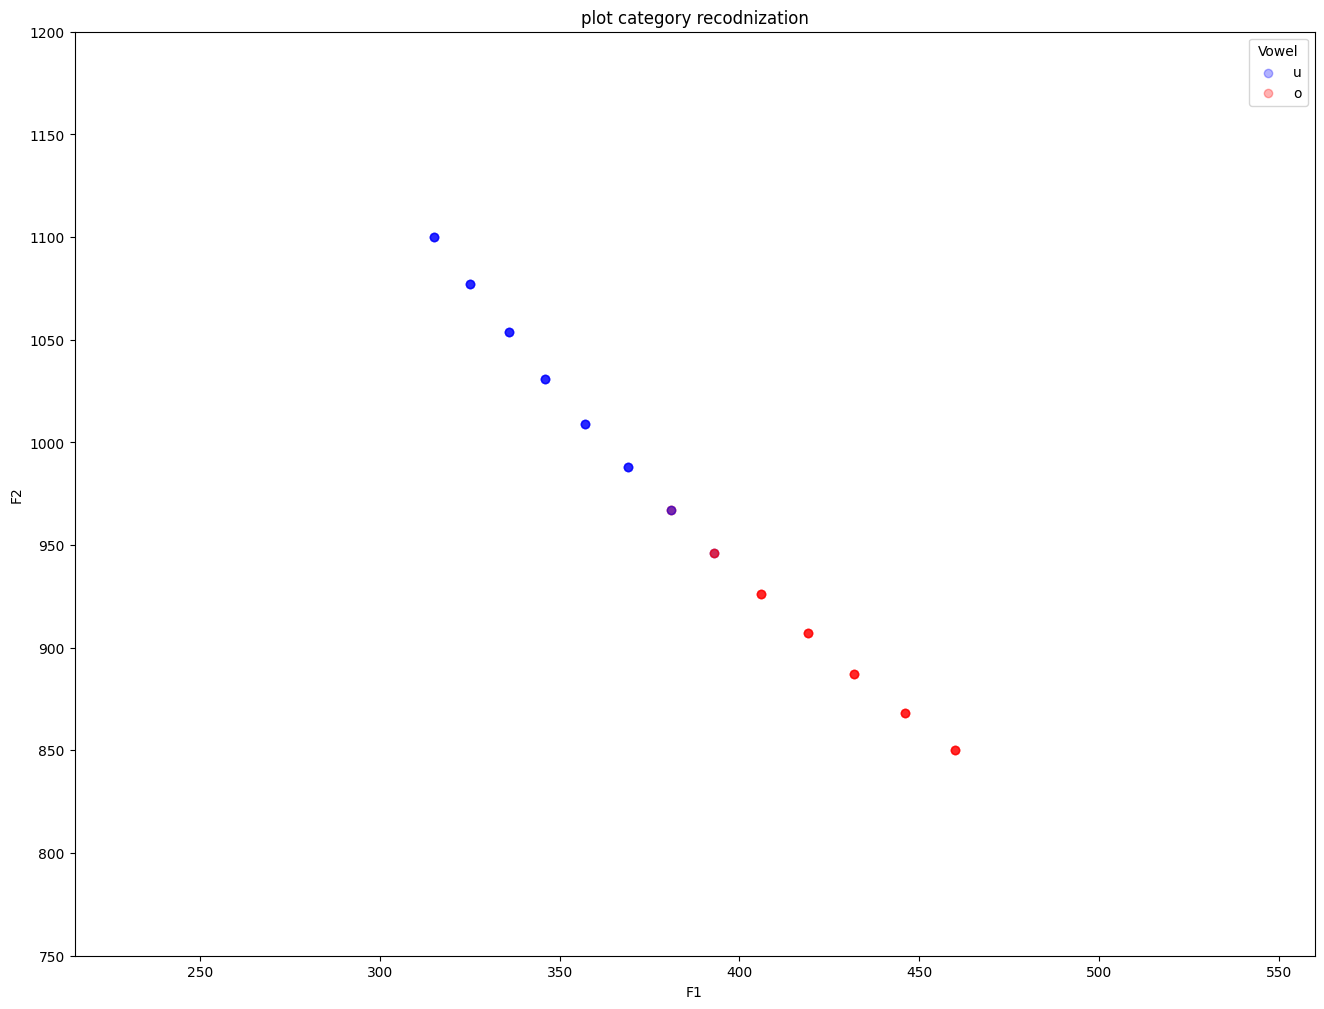

In [27]:
output_txt_file_path_uo = "wave_uo_stimlist.txt"
result_txt_path_uo ="result_uo.txt"
output_csv_path_uo = "result_uo.csv"
count_vowel(result_txt_path_uo)
f1_list_uo, f2_list_uo, vowel_list_uo=create_csv_result(output_txt_file_path_uo, result_txt_path_uo, output_csv_path_uo)
plot_results(f1_list_uo, f2_list_uo, vowel_list_uo)